In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.integrate as intgr
import scipy.stats as st

## Лабортаторная работа №3 «Имитация систем непрерывных и дискретных случайных величин» 

### Вариант 2
$f(x, y) = 0.5 * sin(x + y)$

### 1. Формирование двумерной НСВ

In [264]:
left = 0
right = np.pi / 2

In [265]:
def f(x, y):
    return 0.5 * np.sin(x + y)

def fx(x, a=left, b=right):
    return intgr.quad(lambda y, x: 0.5 * np.sin(x + y), a, b, args=(x,))[0]

def fy(y, a=left, b=right):
    return intgr.quad(lambda x, y: 0.5 * np.sin(x + y), a, b, args=(y,))[0]

In [305]:
f_max = f(left, right)

def neumann_method(a, b, f_max, n):
    X, Y = [], []
    for _ in range(n):
        while True:            
            x1, y1 = a + random.random() * (b - a), a + random.random() * (b - a)
            z = random.random() * f_max

            if f(x1, y1) > z:
                X.append(x1)
                Y.append(y1)
                break
                
    return X, Y

In [306]:
n = int(1e3)
X, Y = neumann_method(left, right, f_max, n)

### 1) Тест на независимость

Если $x$ и $y$ независимы, то $f(x, y) = f(x) * f(y)$

In [299]:
difference = [abs(f(x, y) - fx(x) * fy(y)) for x, y in zip(X, Y)]
print(np.mean(difference))

0.0981973637059001


$|f(x, y) - f(x) * f(y)| \not= 0$, т.е. х и у - зависимы

### 2) Условные плотности распределения

$f(x|Y = y) = {f(x, y) \over f(y)}$

$f(y|X = x) = {f(x, y) \over f(x)}$

In [269]:
def f_x_y(x, y):
    return f(x, y) / fy(y)

def f_y_x(x, y):
    return f(x, y) / fx(x)

### 3) Гистограммы

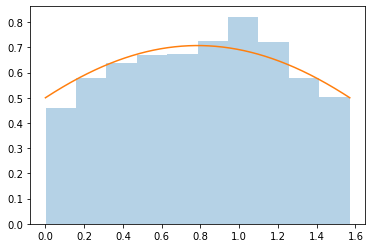

In [307]:
arange = np.linspace(left, right, n)
plt.hist(X, alpha=0.33, density=True)
plt.plot(arange, [fx(x) for x in arange])
plt.show()

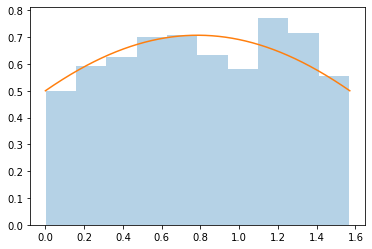

In [308]:
arange = np.linspace(left, right, n)
plt.hist(Y, alpha=0.33, density=True)
plt.plot(arange, [fy(y) for y in arange])
plt.show()

### 4. Характеристики

In [272]:
Mx = intgr.quad(lambda x: x * fx(x), left, right)[0]
My = intgr.quad(lambda y: y * fy(y), left, right)[0]
Mxy = intgr.dblquad(lambda x, y: x * y * f(x, y), left, right, lambda x: left, lambda x: right)[0]

def mean(X):
    return sum(X) / len(X)

Mx_dot = np.mean(X)
My_dot = np.mean(Y)

print(f'Теоретические значения МО: Mx = {Mx}, My = {My}')
print(f'Точечные значения МО: Mx = {Mx_dot} (integrated python method), {mean(X)};\n\
My = {My_dot} (integrated python method), {mean(Y)}')

Теоретические значения МО: Mx = 0.7853981633974483, My = 0.7853981633974483
Точечные значения МО: Mx = 0.7916006251322569 (integrated python method), 0.7916006251322572;
My = 0.791946772902684 (integrated python method), 0.791946772902685


In [273]:
Dx = intgr.quad(lambda x: x ** 2 * fx(x), left, right)[0] - Mx ** 2
Dy = intgr.quad(lambda y: y ** 2 * fy(y), left, right)[0] - My ** 2

def var(X, Mx):
    return sum([(x - Mx) ** 2 for x in X]) / len(X)

Dx_dot = np.var(X)
Dy_dot = np.var(Y)

print(f'Теоретические значения дисперсии: Dx = {Dx},  Dy = {Dy}')
print(f'Точечные значения дисперсии: Dx = {Dx_dot} (python), {var(X, Mx)}; Dy = {Dy_dot} (python), {var(Y, My)}')

Теоретические значения дисперсии: Dx = 0.18764660186298154,  Dy = 0.18764660186298154
Точечные значения дисперсии: Dx = 0.19572846809613367 (python), 0.1957669386277055; Dy = 0.19123602858536537 (python), 0.19127891287181764


Точечная оценка корреляции вычисляется по формуле:
${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{m_{x}})(y_{i}-{m_{y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{m_{x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{m_{y}})^{2}}}}}}$

In [274]:
def corr_coef_dot(X, Y, Mx_dot, My_dot):
    num = sum([(x - Mx_dot) * (y - My_dot) for x, y in zip(X, Y)])
    sum1, sum2 = sum([(x - Mx_dot) ** 2 for x in X]), sum([(y - My_dot) ** 2 for y in Y])
    return num / np.sqrt(sum1 * sum2)

In [275]:
corr_coef = (Mxy - Mx * My) / np.sqrt(Dx * Dy)

print(f'Теоретическое значение коэфф. корреляции: {corr_coef}')
print(f'Точечное значение коэфф. корреляции: {st.pearsonr(X, Y)[0]} (integrated python method) or \
{corr_coef_dot(X, Y, Mx_dot, My_dot)}')

Теоретическое значение коэфф. корреляции: -0.24542916213754049
Точечное значение коэфф. корреляции: -0.21282117198607486 (integrated python method) or -0.21282117198607445


In [23]:
print(f'Доверительный интервал для Mx: {st.t.interval(0.99, len(X)-1, loc=Mx_dot, scale=st.sem(X))}')
print(f'Доверительный интервал для My: {st.t.interval(0.99, len(Y)-1, loc=My_dot, scale=st.sem(Y))}')

Доверительный интервал для Mx: (0.7623768041322448, 0.8337024644208878)
Доверительный интервал для My: (0.7637040236613349, 0.8337713416120055)


In [276]:
def var_interval(X, Mx, acc):
    alpha = 1 - acc
    n = len(X) - 1
    S = var(X, Mx)
    left = (n * S ** 2) / st.chi2.ppf(1 - alpha / 2, df=n)
    right = (n * S ** 2) / st.chi2.ppf(alpha / 2, df=n)
    return left, right

print(f'Доверительный интервал для Dx: {var_interval(X, Mx_dot, 0.99)}')
print(f'Доверительный интервал для Dy: {var_interval(Y, My_dot, 0.99)}')

Доверительный интервал для Dx: (0.034235307671097746, 0.04311673311007552)
Доверительный интервал для Dy: (0.032681777827989165, 0.041160181930008324)


In [277]:
def corr_interval(X, Y, Mx, My, acc):
    r = corr_coef_dot(X, Y, Mx, My)
    z = 0.5 * np.log10((1 + r) / (1 - r)) + (r / (2 * (len(X) - 1)))
    se = 1 / np.sqrt(len(X) - 3)
    c_acc = st.norm.ppf(1 - acc / 2)
    z_left, z_right = z - se * c_acc, z + se * c_acc
    return np.tanh(z_left), np.tanh(z_right)

print(f'Доверительный интервал для корреляции: {corr_interval(X, Y, Mx, My, 0.99)}')

Доверительный интервал для корреляции: (-0.09397108940671796, -0.09318416333329746)


### 2. Формирование двумерной ДСВ

In [278]:
P = np.array([[0.02, 0.09, 0.1, 0.09],
            [0.08, 0.06, 0.07, 0.05],
            [0.07, 0.03, 0.1, 0.06],
            [0.03, 0.05, 0.06, 0.04]])

X = [1, 2, 3, 4]
Y = [5, 6, 7, 8]

In [279]:
def dsv_gen(X, Y, P, N):
    x, y = [], []
    for _ in range(N):
        n, m = len(X), len(Y)
        q = [sum(P[:, i]) for i in range(n)]
        l = [sum(q[:k + 1]) for k in range(n)]
        #print(l)

        e = random.random()
        k = 0  
        #print(f'e={e}')
        while e > l[k]:
            k += 1
        #print(e, k)

        r = [sum(P[:s + 1, k]) for s in range(m)]
        r_norm = [r[i] / max(r) for i in range(m)]
        #print(r_norm)

        e = random.random()
        s = 0    
        while e > r_norm[s]:
            s += 1
        #print(e, s)

        x.append(X[k])
        y.append(Y[s])
    return x, y

In [288]:
n = int(1e4)
    
x, y = dsv_gen(X, Y, P, n)
p_x_sum = [sum(P[:, i]) for i in range(len(X))]
p_y_sum = [sum(P[i]) for i in range(len(Y))]

x_sum = [x.count(x_val) / n for x_val in X]
y_sum = [y.count(y_val) / n for y_val in Y]

print(f'Теоретические значения x, y: {p_x_sum}, {p_y_sum}')
print(f'Значения x и y, полученные экспериментальным путем: {x_sum}, {y_sum}')

Теоретические значения x, y: [0.2, 0.22999999999999998, 0.33, 0.24000000000000002], [0.30000000000000004, 0.26, 0.26, 0.18000000000000002]
Значения x и y, полученные экспериментальным путем: [0.2041, 0.2287, 0.3268, 0.2404], [0.3002, 0.2667, 0.2581, 0.175]


### 1) Тест на независимость

In [281]:
def independence_test(p_x_sum, p_y_sum, P):
    difference = []
    for i in range(len(p_x_sum)):
        for j in range(len(p_y_sum)):
            difference.append(abs(P[i][j] - p_x_sum[i] * p_y_sum[j]))
    return np.mean(difference)

print(independence_test(p_x_sum, p_y_sum, P))

0.023100000000000002


$|F(x, y) - F(x)*F(y)| \not= 0$, т.е. СВ х и у зависимы

### 2) Условные вероятности

In [282]:
p_xy = np.copy(P)
p_yx = np.copy(P)

for i in range(len(p_x_sum)):
    for j in range(len(p_y_sum)):
        p_xy[i][j] /= p_y_sum[j]
        p_yx[i][j] /= p_x_sum[i]
    
print(p_xy)       
print(p_yx)

[[0.06666667 0.34615385 0.38461538 0.5       ]
 [0.26666667 0.23076923 0.26923077 0.27777778]
 [0.23333333 0.11538462 0.38461538 0.33333333]
 [0.1        0.19230769 0.23076923 0.22222222]]
[[0.1        0.45       0.5        0.45      ]
 [0.34782609 0.26086957 0.30434783 0.2173913 ]
 [0.21212121 0.09090909 0.3030303  0.18181818]
 [0.125      0.20833333 0.25       0.16666667]]


### 3) Гистограммы


[0.2, 0.22999999999999998, 0.33, 0.24000000000000002]


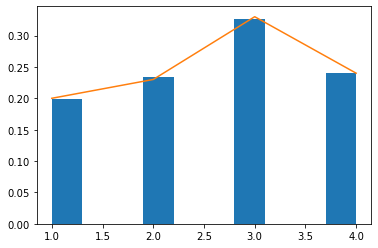

[0.30000000000000004, 0.26, 0.26, 0.18000000000000002]


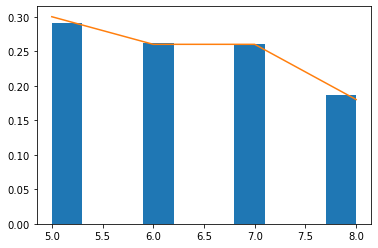

In [283]:
plt.hist(x, weights=[1/n]*n)
plt.plot(X, p_x_sum) 
print(p_x_sum)
plt.show()

plt.hist(y, weights=[1/n]*n)
plt.plot(Y, p_y_sum) 
print(p_y_sum)
plt.show()

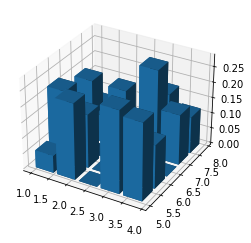

In [284]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=5, range=[[min(X), max(X)], [min(Y), max(Y)]], normed=True)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

### 4) Характеристики

In [285]:
def mean_dsv(X, p_sum):
    return sum([X[i] * p_sum[i] for i in range(len(X))])

def var_dsv(X, p_sum, M):
    return sum([(X[i] ** 2) * p_sum[i] for i in range(len(X))]) - M ** 2

In [286]:
Mx = mean_dsv(X, p_x_sum)
My = mean_dsv(Y, p_y_sum)
Mx_dot = mean_dsv(X, x_sum)
My_dot = mean_dsv(Y, y_sum)

print(f'Теоретические значения МО: Mx = {Mx}, My = {My}')
print(f'Точечные значения МО: Mx = {Mx_dot}, My = {My_dot}')

Dx = var_dsv(X, p_x_sum, Mx)
Dy = var_dsv(Y, p_y_sum, My)
Dx_dot = var_dsv(X, x_sum, Mx_dot)
Dy_dot = var_dsv(Y, y_sum, My_dot)

print(f'\nТеоретические значения дисперсии: Dx = {Dx},  Dy = {Dy}')
print(f'Точечные значения дисперсии: Dx = {Dx_dot} Dy = {Dy_dot}')

Теоретические значения МО: Mx = 2.61, My = 6.320000000000001
Точечные значения МО: Mx = 2.6071, My = 6.3416

Теоретические значения дисперсии: Dx = 1.1179000000000006,  Dy = 1.177599999999991
Точечные значения дисперсии: Dx = 1.117929590000001 Dy = 1.180309439999995


In [289]:
Mxy = 0
for i in range(len(X)):
    for j in range(len(Y)):
        Mxy += X[j] * Y[i] * P[i][j]

corr = (Mxy - Mx * My) / np.sqrt(Dx * Dy)
corr_dot = corr_coef_dot(x, y, Mx_dot, My_dot)

print('Теоретическое значение коэффициента корреляции', corr)
print(f'Точечная оценка коэффициента корреляции, {corr_dot}')

Теоретическое значение коэффициента корреляции -0.07425731094133826
Точечная оценка коэффициента корреляции, -0.07763634279480924


In [290]:
print(f'Доверительный интервал для Mx: {st.t.interval(0.99, len(x)-1, loc=Mx_dot, scale=st.sem(x))}')
print(f'Доверительный интервал для My: {st.t.interval(0.99, len(y)-1, loc=My_dot, scale=st.sem(y))}')

Доверительный интервал для Mx: (2.579732719595522, 2.6344672804044778)
Доверительный интервал для My: (6.313808982382786, 6.369391017617214)


In [291]:
print(f'Доверительный интервал для Dx: {var_interval(x, Mx_dot, 0.99)}')
print(f'Доверительный интервал для Dy: {var_interval(y, My_dot, 0.99)}')

Доверительный интервал для Dx: (1.2278705160359114, 1.3206779313340067)
Доверительный интервал для Dy: (1.3082213741922417, 1.4071020320391912)


In [292]:
print(f'Доверительный интервал для корреляции: {corr_interval(x, y, Mx_dot, My_dot, 0.99)}')

Доверительный интервал для корреляции: (-0.03390126257214829, -0.03365084158641568)
